In [10]:
import torch
from torch import nn
torch.__version__
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



cuda


Data folder path: D:\Programming\Projects\Facial_Emotion_Recognition\data
Random image path:..\data\train\happy\Training_68102525.jpg
Image class:happy
Image height:48
Image width: 48


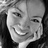

In [16]:
from pathlib import Path
from PIL import Image
import random

# go up one level to reach project root
image_path = Path("../data")

print(f"Data folder path: {image_path.resolve()}")

if not image_path.exists():
    raise FileNotFoundError(f"Data folder not found at {image_path.resolve()}")

# collect all jpgs (train/test/class/image.jpg)
image_path_list = list(image_path.glob("*/*/*.jpg"))

if not image_path_list:
    raise ValueError("No images found inside data folder")

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path:{random_image_path}")
print(f"Image class:{image_class}")
print(f"Image height:{img.height}")
print(f"Image width: {img.width}")
img


(np.float64(-0.5), np.float64(47.5), np.float64(47.5), np.float64(-0.5))

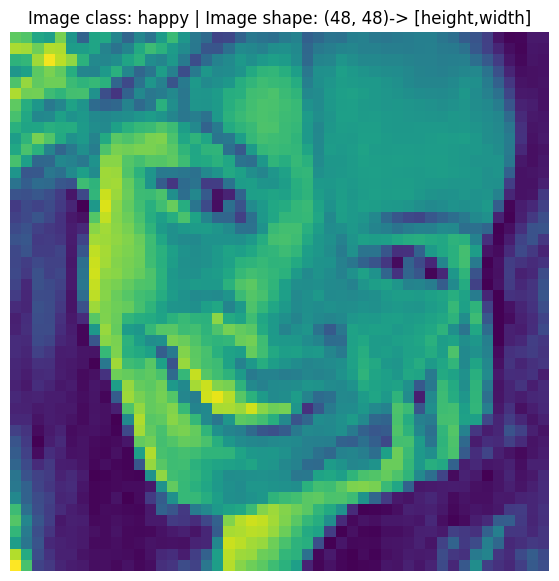

In [18]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}-> [height,width]")
plt.axis(False)

In [20]:
img_as_array.shape

(48, 48)

Transforming Data

In [24]:
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])

In [25]:
data_transform(img)

tensor([[[0.7529, 0.7294, 0.5922,  ..., 0.0157, 0.0667, 0.0667],
         [0.8745, 0.8627, 0.7804,  ..., 0.0118, 0.0588, 0.0549],
         [0.6471, 0.6627, 0.8588,  ..., 0.0196, 0.0549, 0.0471],
         ...,
         [0.5569, 0.3882, 0.2588,  ..., 0.1333, 0.1647, 0.1529],
         [0.8863, 0.6118, 0.2353,  ..., 0.2235, 0.2941, 0.2235],
         [1.0000, 0.7137, 0.2000,  ..., 0.1843, 0.2824, 0.2392]]])

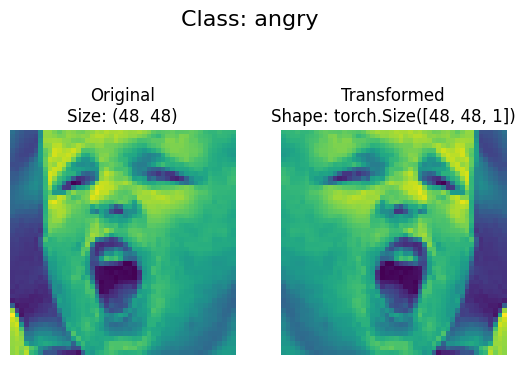

In [26]:
def plot_transformed_images(image_paths: list,transform,n=1,seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)
plot_transformed_images(image_path_list,
                        data_transform,1,42)

In [27]:
#setup train and testing paths
train_dir = image_path /"train"
test_dir = image_path/"test"

train_dir,test_dir

(WindowsPath('../data/train'), WindowsPath('../data/test'))

In [28]:
#use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 28709
     Root location: ..\data\train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 7178
     Root location: ..\data\test
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))